# Project: Wrangling and Analyze Data

In [61]:
# importing all Libraries 
import pandas as pd
import numpy as np
import requests
import json
import tweepy
from tweepy import OAuthHandler
import io 
from timeit import default_timer as timer
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Table of content 

1.[Data Gatherig](#gath)<br>

2. [Assesing Data](#ases)<br>
    2.1 [Quality issues](#qua)<br>
    2.2 [Tidiness Issues](#tid)<br>    
    
    
3. [Cleaning data](#cln)<br>
   3.1 [Tweet id's](#twt)<br>
    3.2 [timestams](#tym)<br>
    3.3 [Dog names](#dog)<br>
    3.4 [image numbers](#img)<br>
    3.5 [retweets & empty column](#ret)<br>
    3.6 [Merging Dataframe](#mrg)<br>
    3.7 [new Dog stage column](#dgn)<br>
    3.8 [source column](#src)<br>
    3.9 [stages columns](#stgs)<br>
    
    
4. [Storing Data](#stor)<br>



5. [Analyzing and Visualizing Data](#anaz)<br>
    5.1 [Retweet Correlation](#rtc)<br>
    5.2 [Dog stages Pie](#pie)<br>
    5.3 [Most used Source](#usd)<br>
    5.4 [Highest Rank](#hig)<br>
    
    

## Data Gathering
<a id="gath"></a>

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [62]:
# reading Twitter archive CSV file 
df = pd.read_csv ( 'twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [63]:
# downloading image tsv file from udacity servers using request  

r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').content

predi_to_csv = pd.read_csv(io.StringIO(r.decode('utf-8')))
predi_to_csv = predi_to_csv.to_csv('predi_table.csv', index=False)
image_df = pd.read_csv('predi_table.csv', sep ='\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [64]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'


auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)'''

'# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'Hidden\'\nconsumer_secret = \'Hidden\'\naccess_token = \'Hidden\'\naccess_secret = \'Hidden\'\n\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter arc

In [65]:
# open and read from Tweet JSON relavted files, saved in a tweets_api dateframe
tweets_list =[]
with open('tweet_json.txt', encoding='utf-8') as json_file:
    for line in json_file:

        tweets_dict = {}
        tweets_json = json.loads(line)

        tweets_dict['tweet_id'] = tweets_json['id']
        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']

        tweets_list.append(tweets_dict)

tweets_api = pd.DataFrame(tweets_list)

tweets_api.head()

,favorite_count,retweet_count,tweet_id
0,34091,7066,892420643555336193
1,29585,5342,892177421306343426
2,22280,3511,891815181378084864
3,37264,7280,891689557279858688
4,35613,7812,891327558926688256


## Assessing Data
<a id="ases"></a>

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [67]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [68]:
tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
tweet_id          2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [69]:
df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [70]:
df.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Tucker         10
Lola           10
Penny          10
Bo              9
Winston         9
the             8
Sadie           8
Buddy           7
Bailey          7
Daisy           7
Toby            7
an              7
Koda            6
Rusty           6
Milo            6
Stanley         6
Scout           6
Jack            6
Oscar           6
Jax             6
Leo             6
Dave            6
Bella           6
Gus             5
             ... 
Chevy           1
Callie          1
Godi            1
Fido            1
Dixie           1
Franq           1
Longfellow      1
Sunshine        1
Mingus          1
Tommy           1
O               1
Millie          1
Brady           1
Livvie          1
Rey             1
Marlee          1
Vinnie          1
Arlo            1
Marvin          1
Mary            1
Caryl           1
Dudley          1
Lizzie          1
Amy             1
Severus   

In [71]:
image_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
Cardigan                      19
web_site                      19
beagle                        18
Eskimo_dog                    18
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [72]:
tweets_api.head(5)

,favorite_count,retweet_count,tweet_id
0,34091,7066,892420643555336193
1,29585,5342,892177421306343426
2,22280,3511,891815181378084864
3,37264,7280,891689557279858688
4,35613,7812,891327558926688256


In [73]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [74]:
df.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
116,870308999962521604,NaN,NaN,2017-06-01 16:00:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Rumble, but he's not ready to. Would r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/870308999...,13,10,Rumble,None,None,None,None


In [75]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### Quality issues
<a id="qua"></a>

- tweet_ids should be changes into a String 


-  timestamp is not defined as date 


- Wrong and missing Dog names, ( None, a,an ) change these to no name   


- Drop tweets with no images there are 2075 images and 2356 Tweets


- img_num should be changed into a string  


- delete retweets and semi empty columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) 
        
        
- remove column (doggo,floofer,pupper, puppo)    


- Clean the content of the source column, make it more readable.



### Tidiness issues
<a id="tid"></a>
- change multi-column (doggo,floofer,pupper, puppo) into 1 column 


- merge all tables into a 1 dataframe

## Cleaning Data
<a id="cln"></a>

- cleaning all data as suggested in the assesment 

In [76]:
# Make copies of original pieces of data
df_copy = df.copy()
image_df_copy = image_df.copy()
tweet_api_copy = tweets_api.copy()

## Quality Issue 
<a id="twt"></a>
- Tweet id's should be changes into strings

### Define: 
- changeing type using astype.(str)

### Code

In [77]:
df_copy['tweet_id'] = df_copy['tweet_id'].astype(str) 
image_df_copy ['tweet_id'] = image_df_copy ['tweet_id'].astype(str) 
tweet_api_copy['tweet_id'] = tweet_api_copy['tweet_id'].astype(str)

### Test 
- calling dtype() to check if type has changed 

In [78]:
print ('df id type = ' ,df_copy.tweet_id.dtypes,'\ntweets API id type =', tweet_api_copy.tweet_id.dtype, \
    '\nimages id type =' ,image_df_copy.tweet_id.dtype )

df id type =  object 
tweets API id type = object 
images id type = object


## Quality Issue 
<a id="tym"></a>
- df timestamp should be changed into datetime 

### Define
- chnagig usign pd.to_datetime() which fromar od %Y=year, %m= month, %d = day

### Code

In [79]:
df_copy['timestamp']= pd.to_datetime(df_copy.timestamp, format = '%Y-%m-%d')

### Test
- we can check the datatype using type method


In [80]:
type(df_copy.iloc[0,3])


pandas._libs.tslibs.timestamps.Timestamp

## Quality Issue
<a id="dog"></a>
- Wrong and missing Dog names, ( None, a,an...etc ) changing so they will be treated as one group.

### Define: 
- changin a list on wrong names into 'no name' using replace()

### Code

In [81]:
mask = df_copy.name.str.islower() 
column_name = 'name' 
df_copy.loc[mask, column_name] = np.nan


### Test
-check if names replaced - still exist 

In [82]:
#check if names replaced - still exist  
df_copy[df_copy['name']== 'an']


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Quality Issue 
<a id="img"></a>
- changing img_num from an int into a string  

### Define 
- changing type using .astype(str)

### Code

In [83]:
image_df_copy['img_num'] = image_df_copy.img_num.astype(str)

### Test
- we can check the datatype using type method


In [84]:
type(image_df_copy.iloc[0,2])

str

## Quality Issue
<a id="ret"></a>
- deleting retweets and semi empty colums: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

### Define:
- keep rows with no retweets,then delete any column using .DROP() method


### Code

In [85]:
df_copy= df_copy[df_copy['retweeted_status_id'].isnull()]
df_copy= df_copy[df_copy['retweeted_status_user_id'].isnull()]
df_copy= df_copy[df_copy['retweeted_status_timestamp'].isnull()]
df_copy = df_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                      'retweeted_status_user_id', 'retweeted_status_timestamp'] , axis=1)

### Test 
- call info() to check change 


In [86]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2071 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB


## Tidenes issues 
<a id="mrg"></a>
- merge all tables into a 1 dataframe

### Define:
- merge all using 'merge()' on tweet_id in an inner join 

### Code


In [87]:
df2 = df_copy.merge (image_df_copy , how= 'inner', on = 'tweet_id')\
        .merge(tweet_api_copy, how = 'inner', on = 'tweet_id')

### Test
- showing the new dataframe 

In [88]:
df2.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,34091,7066
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,29585,5342
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,22280,3511
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,37264,7280
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,35613,7812


### Tideness issue 
<a id="dgn"></a>
- creat 1 new columns to have al dog stages : doggo,floofer, pupper, puppo 

### Define:
- creat 1 new column with the 4 variables, and combine using Numpy. make None values as empty   

### Code

In [89]:
# If we set the 'None' to an empty string, we don't have to remove it later for the visualization
dog_stage = df2[['doggo','floofer','pupper','puppo']]
dog_stage = dog_stage.replace('None', '')
dog_list = np.array(dog_stage['doggo'])+np.array(dog_stage['floofer'])+np.array(dog_stage['pupper'])+np.array(dog_stage['puppo'])
# Set the multiple rated dogs to double_stager
dog_list[dog_list == 'doggopupper'] = 'double_stager'
dog_list[dog_list == 'doggopuppo'] = 'double_stager'
dog_list[dog_list == 'doggofloofer'] = 'double_stager'
df2['dog_stage'] = pd.DataFrame(dog_list)

### Test 
- check change using value_counts()

In [90]:
df2.dog_stage.value_counts()

                 1681
pupper            203
doggo              62
puppo              22
double_stager      11
floofer             7
Name: dog_stage, dtype: int64

### Quality issue 
<a id="src"></a>
- Clean the content of source column, make it more readable.

### Define: 
- extracting the source using regex.findall in a lambda function 

### Code

In [91]:

df2['source'] = df2['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])


### Test 
- check using value_sounts()

In [92]:
#check the new 
df2['source'].value_counts()

Twitter for iPhone    1948
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

## Quality Issue
<a id="stgs"></a>
- remove column (doggo,floofer,pupper, puppo)

### define 
- remove using drop() 

### code

In [93]:
df2 = df2.drop(['doggo','floofer','pupper', 'puppo'], axis = 1  )

### test
- call info to check all columns 

In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 22 columns):
tweet_id              1986 non-null object
timestamp             1986 non-null datetime64[ns]
source                1986 non-null object
text                  1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
name                  1888 non-null object
jpg_url               1986 non-null object
img_num               1986 non-null object
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null bool
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1986 non-null bool
p3                    1986 non-null object
p3_conf               1986 non-null float64
p3_dog                1986 non-null bool
favorite_count        1986 non-null int64
retweet_count         1986 non-

## Storing Data
<a id="stor"></a>

In [95]:
# storing the dataset
df2.to_csv('twitter_archive_master.csv', encoding='utf-8',index= False)

## Analyzing and Visualizing Data
<a id="anaz"></a>

In [96]:
df = pd.read_csv('twitter_archive_master.csv')

In [97]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,bagel,0.085851,False,banana,0.076110,False,34091,7066,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,29585,5342,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,malamute,0.078253,True,kelpie,0.031379,True,22280,3511,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,37264,7280,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,35613,7812,NaN


In [98]:
df['dog_stage'].value_counts()

pupper           203
doggo             62
puppo             22
double_stager     11
floofer            7
Name: dog_stage, dtype: int64

## Insights & Visualization


### 1.
<a id="rtc"></a>
- check see the correlation, if any, between the retweets and favorite count using a scatter plot 

Text(0.5,1,'corelation between favorite and retweet')

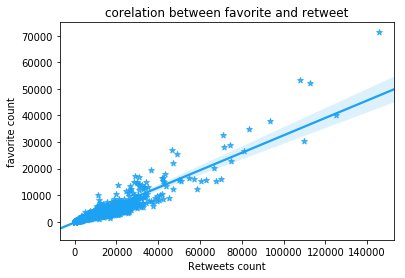

In [154]:
# regression  plot , corelation between favorite and retweet counts 
sns.regplot(y= df.retweet_count, x=df.favorite_count, data = df,marker = '*', color ='#1DA1F2' )
plt.ylabel('favorite count')
plt.xlabel( 'Retweets count')
plt.title('corelation between favorite and retweet')

### 2. 
<a id="pie"></a>
- Visualizing the count of life stages for each dog stage, using a piechart with percentile  

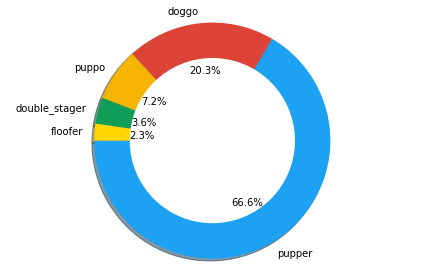

In [149]:
# avoiding None in life stages 
dogs = df.dog_stage.value_counts()

#plotting a piechart with life stages and count of each 
colors = ['#1DA1F2','#DB4437','#F4B400','#0F9D58','#FFD700']
plt.pie(dogs.values,  labels= dogs.index, autopct='%1.1f%%',
        shadow=True, startangle=180, colors = colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.tight_layout()
plt.show()


### 3. <a id="usd"></a>
- showing the used source with the most impact "retweets" 

Text(0.5,1,'source with most impact')

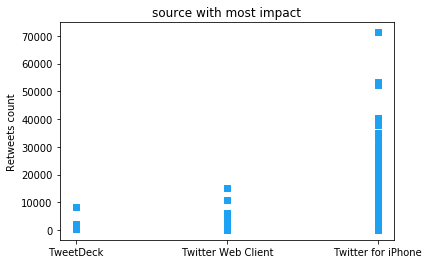

In [152]:
# ploting a scatter plot to show wich source do best 
plt.scatter(x= df.source, y=df.retweet_count, marker = 's', c = '#1DA1F2')
plt.ylabel( 'Retweets count')
plt.title('source with most impact')

## 4. 
<a id="hig"></a>
- chekcing highest ranked Dog

In [153]:
df[ df.rating_numerator == df.rating_numerator.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage
719,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,...,False,sunglasses,0.080822,False,sunglass,0.050776,False,4814,2294,NaN


![](https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg)